In [1]:
import pandas as pd
merged_data = pd.read_csv('../data/cleaned/merged_dataset.csv')

/Users/modomodo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/modomodo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/modomodo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.04609D-01    |proj g|=  7.73094D-01

At iterate    5    f= -9.89235D-01    |proj g|=  6.57020D-01

At iterate   10    f= -9.91278D-01    |proj g|=  7.50157D-02

At iterate   15    f= -9.93707D-01    |proj g|=  7.46662D-02

At iterate   20    f= -9.95834D-01    |proj g|=  6.12211D-01

At iterate   25    f= -1.00625D+00    |proj g|=  1.42915D+00

At iterate   30    f= -1.02577D+00    |proj g|=  1.46314D+00

At iterate   35    f= -1.03803D+00    |proj g|=  1.69425D+00

At iterate   40    f= -1.06069D+00    |proj g|=  9.37832D-02

At iterate   45    f= -1.07165D+00    |proj g|=  1.10641D+00

At iterate   50    f= -1.07857D+00    |proj g|=  4.49800D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/modomodo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/modomodo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/modomodo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


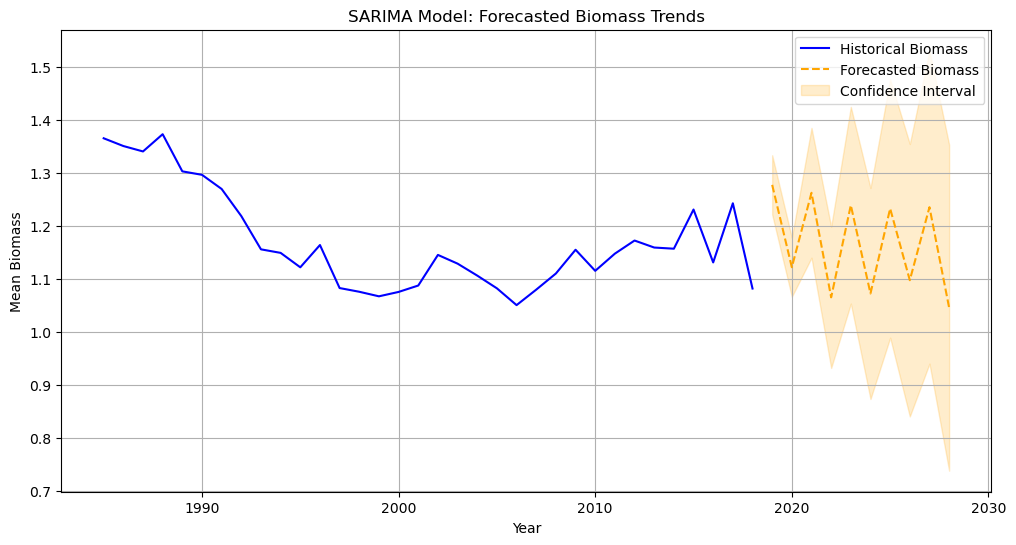

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

time_series_data = merged_data.set_index('Year')['BiomassMeanRegion']

sarima_order = (2, 1, 2) 
seasonal_order = (1, 1, 1, 12)
sarima_model = SARIMAX(time_series_data, order=sarima_order, seasonal_order=seasonal_order)
sarima_fitted = sarima_model.fit()

forecast_steps = 10
forecast = sarima_fitted.get_forecast(steps=forecast_steps)
forecast_index = list(range(time_series_data.index.max() + 1, time_series_data.index.max() + 1 + forecast_steps))

forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'Forecasted Biomass': forecast_mean,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Historical Biomass", color="blue")
plt.plot(forecast_index, forecast_mean, label="Forecasted Biomass", color="orange", linestyle='--')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.2, label="Confidence Interval")
plt.title("SARIMA Model: Forecasted Biomass Trends")
plt.xlabel("Year")
plt.ylabel("Mean Biomass")
plt.legend()
plt.grid()
plt.savefig('../result/time_series_result.png')
plt.show()